# Description

It gets the PCA transformation of an input file.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd
import seaborn as sns

import conf
from utils import generate_result_set_name

# Settings

In [3]:
np.random.seed(0)

In [4]:
NULL_DIR = conf.RESULTS["CLUSTERING_NULL_DIR"] / "shuffle_lvs"

## Input data

In [5]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [6]:
INPUT_FILEPATH = Path(
    NULL_DIR,
    "data_transformations",
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [7]:
# output dir for this notebook
RESULTS_DIR = Path(NULL_DIR, "data_transformations", "pca").resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/pca')

## PCA options

In [8]:
# parameters of the dimentionality reduction steps
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [9]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': 50, 'svd_solver': 'full', 'random_state': 0}

# Load input file

In [10]:
data = pd.read_pickle(INPUT_FILEPATH)

In [11]:
display(data.shape)

(3752, 987)

In [12]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-2.408007,-1.745911,1.383013,0.158718,-0.240933,-0.304911,1.823117,-0.716278,-1.769346,-0.043794,...,0.399227,0.849885,-0.593292,0.636568,0.409726,-0.871713,1.638770,0.285165,0.585307,0.592347
100002_raw-Energy,-0.508508,0.514427,-0.792865,-0.091775,-0.013409,0.194047,1.353713,0.117286,-0.323516,-1.641116,...,-0.038535,-1.139394,-0.951591,1.197872,0.893819,-0.820655,0.928634,-0.716778,-0.085735,-1.208965
100003_raw-Protein,-0.284597,-0.325076,-1.412980,1.255510,0.343603,-2.471878,-0.149640,-0.715178,-0.548948,1.210352,...,1.006094,0.595064,1.774559,-0.335165,0.394177,-0.188345,-1.864716,-0.124875,1.253625,0.804944
100004_raw-Fat,-0.427503,-0.096524,-0.348654,-1.250087,-0.253145,-0.236606,-0.600627,0.277239,-0.844748,-0.998437,...,0.249993,-1.520660,0.037241,0.514992,0.512538,-1.083619,0.310643,-1.719033,-0.970770,-2.628077
100005_raw-Carbohydrate,-1.502621,-1.083034,0.531159,0.332981,-1.240640,-0.852565,-0.003171,0.561912,-0.772413,-0.372739,...,-0.577730,-1.163380,0.000251,-0.345607,-1.610004,0.194078,0.605594,1.182825,-1.567705,-0.011902


# PCA

In [13]:
from data.dimreduction import get_pca_proj

In [14]:
dr_data = get_pca_proj(data, DR_OPTIONS)

"PCA object: PCA(n_components=50, random_state=0, svd_solver='full')"

In [15]:
display(dr_data.shape)

(3752, 50)

In [16]:
display(dr_data.head())

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,0.373237,-0.155188,-1.554390,-0.103733,-1.807074,-0.957108,0.330335,0.638391,0.905023,-0.704551,...,0.161732,0.488682,0.761158,0.667089,-0.078934,0.840971,-0.622958,1.075964,3.244039,-0.933407
100002_raw-Energy,1.384398,0.511267,-0.273603,-0.074591,-1.151167,-0.069438,1.242634,-0.439543,0.650348,2.456117,...,0.051967,0.993820,-0.166350,1.497041,-0.875754,2.632726,0.613299,0.041232,4.032974,-0.230092
100003_raw-Protein,-1.247583,2.905641,-1.524196,0.683773,0.766860,-2.478057,-0.201110,1.045590,-0.844712,2.426349,...,0.027646,-1.903636,-0.819195,0.616887,-0.647462,0.170956,2.106036,-2.186258,0.485333,-1.136366
100004_raw-Fat,-0.695167,0.046286,0.730428,0.240547,1.621534,-1.335187,-1.510894,1.790966,-0.682884,-1.572835,...,-2.997557,-0.489466,0.442809,1.217098,-1.604667,-0.776865,-0.983076,0.080423,2.476131,0.431179
100005_raw-Carbohydrate,0.770055,-0.499034,0.053157,0.479019,2.048336,0.984552,-0.090767,0.053451,-0.614035,1.304292,...,-0.280231,-0.892308,-0.522105,-0.358232,1.690968,0.049799,-0.633466,-0.812035,0.901284,2.461845


## Plot

[2022-11-25 04:57:51,708 - numexpr.utils] INFO: Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2022-11-25 04:57:51,708 - numexpr.utils] INFO: NumExpr defaulting to 8 threads.


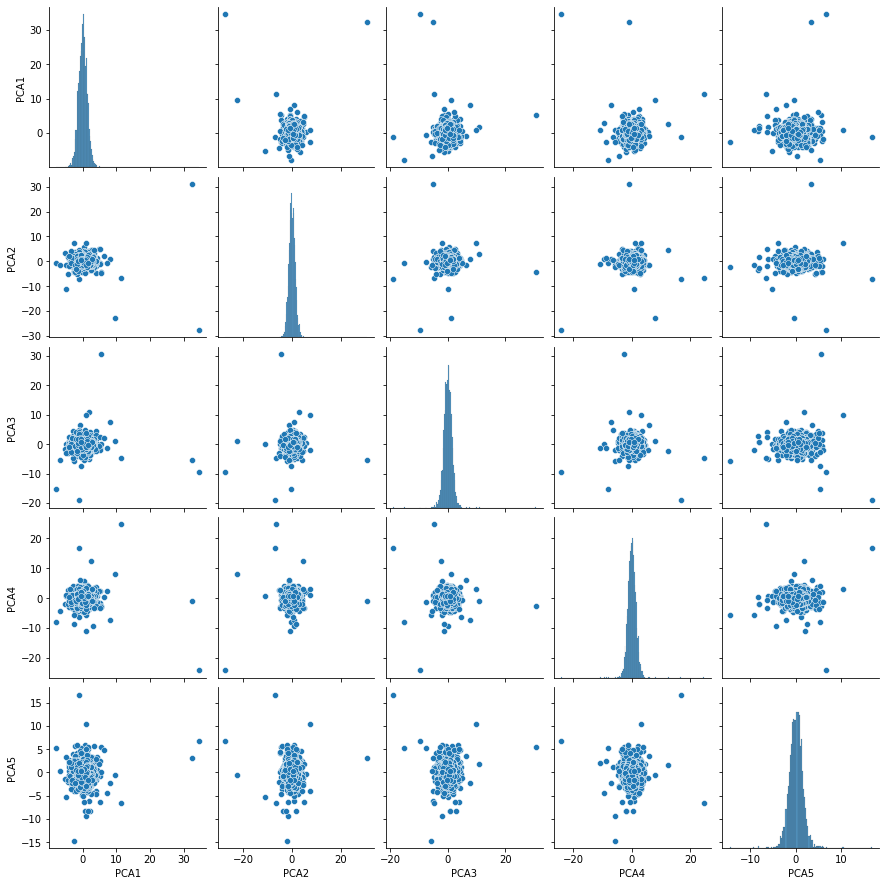

In [17]:
g = sns.pairplot(data=dr_data.iloc[:, :5])

# Save

In [18]:
output_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        ALL_OPTIONS, prefix=f"pca-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

display(output_file)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_lvs/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

In [19]:
dr_data.to_pickle(output_file)